Files starting from `lum_` has the format of 

`13040003 3456966 3457845 16386 0.00648690397942378 1.00000000 0.938175343811395 BBCMB 0.938886112831796 0.00180317170501673 0.000468243000416957`

- Run number
- Start time in seconds since midnight Dec 31, 2013
- End time
- Bunch Fill number
- Sampled Luminosity
- Prescale
- Lifetime
- base trigger for luminosity
- lifetime of base trigger
- FOM - Figure of Merit for polarization of yellow and blue beams
- FOM4 - Figure of Merit 4 for polarization of yellow and blue beams

Files starting from `nev_` has the format of `6182002	62410630.000`

- Start time in seconds since midnight Dec 31, 2013 
- Cumulative Number of events


In [17]:
import os
data_path = './'
data_files = [
 'lum_perrun_VPDMB-nobsmd.txt',
 'lum_perrun_JP2.txt',
 'lum_perrun_BHT2.txt',
 'nev_perday_unix_VPDMB-nobsmd.txt',
 'nev_perday_unix_JP2.txt',
 'nev_perday_unix_BHT2.txt'
]

In [18]:
import pandas as pd
import numpy as np

# - Run number
# - Start time in seconds since midnight Dec 31, 2013
# - End time
# - Bunch Fill number
# - Sampled Luminosity
# - Prescale
# - Lifetime
# - base trigger for luminosity
# - lifetime of base trigger
# - error on lifetime trigger
# - error on lifetime of base trigger
lumi_columns=['run', 'start_time',  'end_time', 'bunch_fill', 'sampled_lumi', 'prescale', 'lifetime', 'base_trigger', 'lifetime_base_trigger', 'FOM', 'FOM4']
# Load VPDMB data
lumi_VPDMB = pd.read_csv(data_path + data_files[0], sep=' ', header=None, names=lumi_columns)

lumi_VPDMB

,run,start_time,end_time,bunch_fill,sampled_lumi,prescale,lifetime,base_trigger,lifetime_base_trigger,FOM,FOM4
0,13040003,3456966,3457845,16386,0.000012,102.365715,0.938987,VPDMB-nobsmd,0.938987,3.461118e-06,8.987742e-07
1,13040016,3462572,3462905,16386,0.000004,89.905716,0.891939,VPDMB-nobsmd,0.891939,1.147976e-06,2.981035e-07
2,13040017,3462974,3463089,16386,0.000001,82.534286,0.939425,VPDMB-nobsmd,0.939425,4.117085e-07,1.069114e-07
3,13040018,3463160,3463854,16386,0.000009,82.619995,0.963992,VPDMB-nobsmd,0.963992,2.637356e-06,6.848619e-07
4,13040037,3473497,3473714,16386,0.000003,63.748569,0.828885,VPDMB-nobsmd,0.828885,7.128735e-07,1.851172e-07
...,...,...,...,...,...,...,...,...,...,...,...
888,13072016,6238285,6240559,16543,0.000069,98.488945,0.915187,VPDMB-nobsmd,0.915187,2.409364e-05,8.399459e-06
889,13072017,6240596,6242200,16543,0.000050,94.062065,0.913841,VPDMB-nobsmd,0.913841,1.728447e-05,6.025666e-06
890,13072018,6242246,6243826,16543,0.000050,89.829498,0.913085,VPDMB-nobsmd,0.913085,1.741875e-05,6.072479e-06
891,13072019,6243884,6244673,16543,0.000025,87.430176,0.910546,VPDMB-nobsmd,0.910546,8.745572e-06,3.048858e-06


In [19]:
# load number of events per day
events_columns = ['start_time', 'cumulated_nevents']
nev_perday_VPDMB = pd.read_csv(data_path + data_files[3], sep='\t', header=None, names=events_columns)
nev_perday_VPDMB

,start_time,cumulated_nevents
0,3456966,311284.0
1,3462572,414530.0
2,3462974,451558.0
3,3463160,688755.0
4,3473497,752869.0
...,...,...
888,6238285,730938049.0
889,6240596,732177485.0
890,6242246,733426550.0
891,6243884,734053678.0


In [20]:
#calculate number of events per start_time
nev_perday_VPDMB['nevents'] = nev_perday_VPDMB.cumulated_nevents.diff()
# first row nevents is equal to cumulated_nevents
nev_perday_VPDMB.loc[0, 'nevents'] = nev_perday_VPDMB.loc[0, 'cumulated_nevents']
nev_perday_VPDMB

,start_time,cumulated_nevents,nevents
0,3456966,311284.0,311284.0
1,3462572,414530.0,103246.0
2,3462974,451558.0,37028.0
3,3463160,688755.0,237197.0
4,3473497,752869.0,64114.0
...,...,...,...
888,6238285,730938049.0,1727708.0
889,6240596,732177485.0,1239436.0
890,6242246,733426550.0,1249065.0
891,6243884,734053678.0,627128.0


In [21]:
# merge the two dataframes by start_time
lumi_VPDMB = pd.merge(lumi_VPDMB, nev_perday_VPDMB, on='start_time')
lumi_VPDMB

,run,start_time,end_time,bunch_fill,sampled_lumi,prescale,lifetime,base_trigger,lifetime_base_trigger,FOM,FOM4,cumulated_nevents,nevents
0,13040003,3456966,3457845,16386,0.000012,102.365715,0.938987,VPDMB-nobsmd,0.938987,3.461118e-06,8.987742e-07,311284.0,311284.0
1,13040016,3462572,3462905,16386,0.000004,89.905716,0.891939,VPDMB-nobsmd,0.891939,1.147976e-06,2.981035e-07,414530.0,103246.0
2,13040017,3462974,3463089,16386,0.000001,82.534286,0.939425,VPDMB-nobsmd,0.939425,4.117085e-07,1.069114e-07,451558.0,37028.0
3,13040018,3463160,3463854,16386,0.000009,82.619995,0.963992,VPDMB-nobsmd,0.963992,2.637356e-06,6.848619e-07,688755.0,237197.0
4,13040037,3473497,3473714,16386,0.000003,63.748569,0.828885,VPDMB-nobsmd,0.828885,7.128735e-07,1.851172e-07,752869.0,64114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,13072016,6238285,6240559,16543,0.000069,98.488945,0.915187,VPDMB-nobsmd,0.915187,2.409364e-05,8.399459e-06,730938049.0,1727708.0
889,13072017,6240596,6242200,16543,0.000050,94.062065,0.913841,VPDMB-nobsmd,0.913841,1.728447e-05,6.025666e-06,732177485.0,1239436.0
890,13072018,6242246,6243826,16543,0.000050,89.829498,0.913085,VPDMB-nobsmd,0.913085,1.741875e-05,6.072479e-06,733426550.0,1249065.0
891,13072019,6243884,6244673,16543,0.000025,87.430176,0.910546,VPDMB-nobsmd,0.910546,8.745572e-06,3.048858e-06,734053678.0,627128.0


In [22]:
# drop base_trigger,start_time, end_time, bunch_fill,base_trigger, lifetime_base_trigger, cumulated_nevents, FOM,FOM4
lumi_VPDMB = lumi_VPDMB.drop(columns=['start_time', 'end_time', 'bunch_fill', 'base_trigger', 'lifetime_base_trigger', 'cumulated_nevents', 'FOM', 'FOM4'])
lumi_VPDMB

,run,sampled_lumi,prescale,lifetime,nevents
0,13040003,0.000012,102.365715,0.938987,311284.0
1,13040016,0.000004,89.905716,0.891939,103246.0
2,13040017,0.000001,82.534286,0.939425,37028.0
3,13040018,0.000009,82.619995,0.963992,237197.0
4,13040037,0.000003,63.748569,0.828885,64114.0
...,...,...,...,...,...
888,13072016,0.000069,98.488945,0.915187,1727708.0
889,13072017,0.000050,94.062065,0.913841,1239436.0
890,13072018,0.000050,89.829498,0.913085,1249065.0
891,13072019,0.000025,87.430176,0.910546,627128.0


In [23]:
# drop bad runs

bad_runs_list = [
    13040003,13040016,13040017,13040018,13040037,13040040,13040041,13040042,13040043,13040044,13040045,13040046,13041002,13041004,13041006,13041007,13041008,13041009,13041010,13041082,13041101,13041102,
    13041108,13041109,13041110,13041115,13041116,13041119,13042001,13042002,13042003,13042006,13042007,13042008,13042013,13042015,13042016,13042017,13042018,13042019,13042020,13042022,13042023,13042024,
    13042025,13042026,13042027,13042046,13042047,13042048,13042049,13042050,13043005,13043006,13043011,13043012,13043013,13043017,13043023,13043030,13043031,13043032,13043035,13043044,13043047,13043048,
    13043049,13043050,13043051,13043052,13043053,13043054,13043055,13043056,13043057,13043058,13043059,13043060,13043063,13044017,13044018,13044019,13044020,13044021,13044022,13044023,13044024,13044025,
    13044026,13044029,13044030,13044031,13044034,13044118,13044119,13044121,13044122,13044123,13044124,13044125,13044126,13045001,13045003,13045005,13045006,13045007,13045012,13045029,13045056,13045133,
    13045134,13045135,13045138,13045145,13045146,13045164,13046001,13046002,13046003,13046004,13046008,13046010,13046011,13046012,13046013,13046014,13046015,13046017,13046028,13046029,13046118,13046119,
    13046120,13046121,13047002,13047003,13047004,13047014,13047018,13047022,13047023,13047024,13047026,13047027,13047028,13047029,13047030,13047031,13047032,13047033,13047034,13047035,13047036,13047037,
    13047039,13047040,13047041,13047042,13047043,13047044,13047045,13047046,13047047,13047048,13047049,13047050,13047051,13047052,13047053,13047054,13047055,13047122,13047123,13047124,13047126,13048007,
    13048022,13048046,13049004,13049005,13049050,13049052,13049075,13049086,13049087,13049088,13049089,13050007,13050025,13050026,13050027,13050033,13050039,13050042,13050043,13050044,13050046,13050047,
    13050049,13050050,13051068,13051080,13051088,13051095,13051102,13052021,13052022,13052054,13052063,13052068,13053010,13053021,13054004,13054005,13054006,13054007,13054008,13054009,13054011,13054012,
    13054013,13054014,13054015,13054016,13054017,13054018,13054019,13054020,13054022,13054042,13054045,13054046,13054057,13055015,13055072,13055081,13055082,13055086,13055087,13055088,13055089,13055090,
    13056011,13056012,13056034,13056035,13056037,13056038,13056039,13057038,13057039,13058019,13058030,13058047,13058048,13059003,13059004,13059005,13059006,13059007,13059008,13059009,13059010,13059011,
    13059012,13059013,13059014,13059015,13059016,13059017,13059018,13059019,13059020,13059021,13059022,13059023,13059025,13059026,13059027,13059035,13059037,13059038,13059039,13059076,13059077,13059078,
    13059079,13059080,13059082,13059083,13059084,13059085,13059086,13059087,13060001,13060002,13060003,13060009,13060012,13061026,13063033,13064030,13064057,13064059,13064074,13065048,13066035,13066036,
    13066101,13066102,13066104,13066109,13066110,13067001,13067002,13067003,13067004,13067005,13067006,13067007,13067008,13067009,13067010,13067011,13067012,13067013,13067014,13067015,13067017,13068017,
    13068022,13068027,13068029,13068034,13068036,13068037,13069006,13069009,13069029,13070030,13070056,13071034,13071037,13071038,13071040]
lumi_VPDMB = lumi_VPDMB[~lumi_VPDMB.run.isin(bad_runs_list)]
lumi_VPDMB

,run,sampled_lumi,prescale,lifetime,nevents
59,13043027,0.000026,48.520000,0.952959,662432.0
60,13043029,0.000047,47.345715,0.950482,1179628.0
64,13043034,0.000016,41.038570,0.952342,395095.0
67,13043046,0.000043,96.987144,0.946440,1070158.0
82,13043062,0.000008,50.807144,0.950743,189824.0
...,...,...,...,...,...
888,13072016,0.000069,98.488945,0.915187,1727708.0
889,13072017,0.000050,94.062065,0.913841,1239436.0
890,13072018,0.000050,89.829498,0.913085,1249065.0
891,13072019,0.000025,87.430176,0.910546,627128.0


In [24]:
# do the same for JP2
lumi_JP2 = pd.read_csv(data_path + data_files[1], sep=' ', header=None, names=lumi_columns)
nev_perday_JP2 = pd.read_csv(data_path + data_files[4], sep='\t', header=None, names=events_columns)
nev_perday_JP2['nevents'] = nev_perday_JP2.cumulated_nevents.diff()
lumi_JP2 = pd.merge(lumi_JP2, nev_perday_JP2, on='start_time')
lumi_JP2 = lumi_JP2.drop(columns=['start_time', 'end_time', 'bunch_fill', 'base_trigger', 'lifetime_base_trigger', 'cumulated_nevents', 'FOM', 'FOM4'])
lumi_JP2 = lumi_JP2[~lumi_JP2.run.isin(bad_runs_list)]
lumi_JP2


,run,sampled_lumi,prescale,lifetime,nevents
80,13048009,0.039537,1.0,0.903225,105540.0
81,13048010,0.006593,1.0,0.901679,17294.0
82,13048011,0.036189,1.0,0.910116,96125.0
83,13048012,0.035659,1.0,0.913892,95107.0
84,13048013,0.033489,1.0,0.896269,89354.0
...,...,...,...,...,...
773,13072016,0.056108,1.0,0.913190,127776.0
774,13072017,0.038670,1.0,0.912101,87599.0
775,13072018,0.037365,1.0,0.909080,83824.0
776,13072019,0.018305,1.0,0.905712,41408.0


In [25]:
# do the same for BHT2
lumi_BHT2 = pd.read_csv(data_path + data_files[2], sep=' ', header=None, names=lumi_columns)
nev_perday_BHT2 = pd.read_csv(data_path + data_files[5], sep='\t', header=None, names=events_columns)
nev_perday_BHT2['nevents'] = nev_perday_BHT2.cumulated_nevents.diff()
lumi_BHT2 = pd.merge(lumi_BHT2, nev_perday_BHT2, on='start_time')
lumi_BHT2 = lumi_BHT2.drop(columns=['start_time', 'end_time', 'bunch_fill', 'base_trigger', 'lifetime_base_trigger', 'cumulated_nevents', 'FOM', 'FOM4'])
lumi_BHT2 = lumi_BHT2[~lumi_BHT2.run.isin(bad_runs_list)]
lumi_BHT2

,run,sampled_lumi,prescale,lifetime,nevents
172,13048009,0.039565,1.0,0.903872,75533.0
173,13048010,0.006644,1.0,0.908635,12721.0
174,13048011,0.036247,1.0,0.911580,68586.0
175,13048012,0.035749,1.0,0.916200,67777.0
176,13048013,0.033549,1.0,0.897873,63568.0
...,...,...,...,...,...
866,13072016,0.056269,1.0,0.915825,95108.0
867,13072017,0.038824,1.0,0.915729,65186.0
868,13072018,0.037561,1.0,0.913867,63087.0
869,13072019,0.018365,1.0,0.908664,30792.0


In [26]:
#Make a unified dataframe with VPDMB+JP2 on the same run
lumi_VPDMB_JP2 = pd.merge(lumi_VPDMB, lumi_JP2, on='run', suffixes=('_VPDMB', '_JP2'))
# show all columns
pd.set_option('display.max_columns', None)
lumi_VPDMB_JP2

,run,sampled_lumi_VPDMB,prescale_VPDMB,lifetime_VPDMB,nevents_VPDMB,sampled_lumi_JP2,prescale_JP2,lifetime_JP2,nevents_JP2
0,13048009,0.000038,127.116951,0.905088,949144.0,0.039537,1.0,0.903225,105540.0
1,13048010,0.000007,117.034012,0.909393,171917.0,0.006593,1.0,0.901679,17294.0
2,13048011,0.000042,103.825981,0.913491,1047138.0,0.036189,1.0,0.910116,96125.0
3,13048012,0.000042,100.368111,0.916587,1059204.0,0.035659,1.0,0.913892,95107.0
4,13048013,0.000043,91.229141,0.898518,1083399.0,0.033489,1.0,0.896269,89354.0
...,...,...,...,...,...,...,...,...,...
525,13072016,0.000069,98.488945,0.915187,1727708.0,0.056108,1.0,0.913190,127776.0
526,13072017,0.000050,94.062065,0.913841,1239436.0,0.038670,1.0,0.912101,87599.0
527,13072018,0.000050,89.829498,0.913085,1249065.0,0.037365,1.0,0.909080,83824.0
528,13072019,0.000025,87.430176,0.910546,627128.0,0.018305,1.0,0.905712,41408.0


In [27]:
#Make a unified dataframe with VPDMB+BHT2 on the same run
lumi_VPDMB_BHT2 = pd.merge(lumi_VPDMB, lumi_BHT2, on='run', suffixes=('_VPDMB', '_BHT2'))
lumi_VPDMB_BHT2


,run,sampled_lumi_VPDMB,prescale_VPDMB,lifetime_VPDMB,nevents_VPDMB,sampled_lumi_BHT2,prescale_BHT2,lifetime_BHT2,nevents_BHT2
0,13048009,0.000038,127.116951,0.905088,949144.0,0.039565,1.0,0.903872,75533.0
1,13048010,0.000007,117.034012,0.909393,171917.0,0.006644,1.0,0.908635,12721.0
2,13048011,0.000042,103.825981,0.913491,1047138.0,0.036247,1.0,0.911580,68586.0
3,13048012,0.000042,100.368111,0.916587,1059204.0,0.035749,1.0,0.916200,67777.0
4,13048013,0.000043,91.229141,0.898518,1083399.0,0.033549,1.0,0.897873,63568.0
...,...,...,...,...,...,...,...,...,...
526,13072016,0.000069,98.488945,0.915187,1727708.0,0.056269,1.0,0.915825,95108.0
527,13072017,0.000050,94.062065,0.913841,1239436.0,0.038824,1.0,0.915729,65186.0
528,13072018,0.000050,89.829498,0.913085,1249065.0,0.037561,1.0,0.913867,63087.0
529,13072019,0.000025,87.430176,0.910546,627128.0,0.018365,1.0,0.908664,30792.0


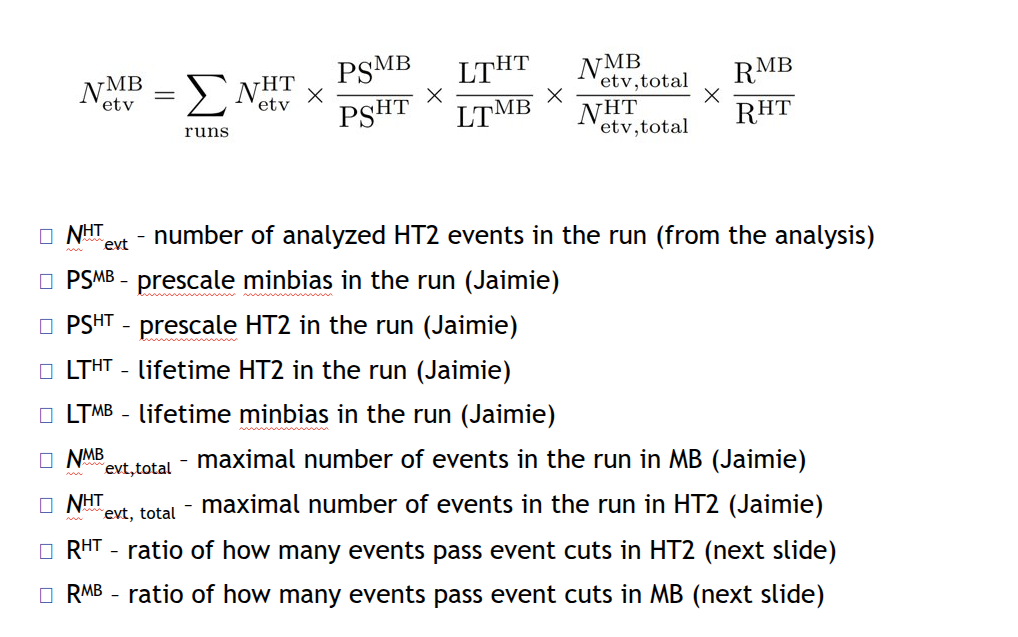

# Calculate correction factor for each run for JP2 trigger

In [28]:
# BHT2_weight =(prescale_VPDMB/prescale_BHT2)*(lifetime_BHT2/lifetime_VPDMB)*(nevents_VPDMB/nevents_BHT2)
df=lumi_VPDMB_BHT2
lumi_VPDMB_BHT2['BHT2_weight'] = (df.prescale_VPDMB/df.prescale_BHT2)*(df.lifetime_BHT2/df.lifetime_VPDMB)*(df.nevents_VPDMB/df.nevents_BHT2)
# save to csv
lumi_VPDMB_BHT2.to_csv('lumi_VPDMB_BHT2.csv', index=False)
lumi_VPDMB_BHT2

,run,sampled_lumi_VPDMB,prescale_VPDMB,lifetime_VPDMB,nevents_VPDMB,sampled_lumi_BHT2,prescale_BHT2,lifetime_BHT2,nevents_BHT2,BHT2_weight
0,13048009,0.000038,127.116951,0.905088,949144.0,0.039565,1.0,0.903872,75533.0,1595.199604
1,13048010,0.000007,117.034012,0.909393,171917.0,0.006644,1.0,0.908635,12721.0,1580.328184
2,13048011,0.000042,103.825981,0.913491,1047138.0,0.036247,1.0,0.911580,68586.0,1581.847585
3,13048012,0.000042,100.368111,0.916587,1059204.0,0.035749,1.0,0.916200,67777.0,1567.868182
4,13048013,0.000043,91.229141,0.898518,1083399.0,0.033549,1.0,0.897873,63568.0,1553.715841
...,...,...,...,...,...,...,...,...,...,...
526,13072016,0.000069,98.488945,0.915187,1727708.0,0.056269,1.0,0.915825,95108.0,1790.372538
527,13072017,0.000050,94.062065,0.913841,1239436.0,0.038824,1.0,0.915729,65186.0,1792.176165
528,13072018,0.000050,89.829498,0.913085,1249065.0,0.037561,1.0,0.913867,63087.0,1780.066665
529,13072019,0.000025,87.430176,0.910546,627128.0,0.018365,1.0,0.908664,30792.0,1776.974854


In [29]:
# JP2_weight =(prescale_VPDMB/prescale_JP2)*(lifetime_JP2/lifetime_VPDMB)*(nevents_VPDMB/nevents_JP2)
df=lumi_VPDMB_JP2
lumi_VPDMB_JP2['JP2_weight'] = (df.prescale_VPDMB/df.prescale_JP2)*(df.lifetime_JP2/df.lifetime_VPDMB)*(df.nevents_VPDMB/df.nevents_JP2)
# drop the columns which do not have JP2_weight, specifically runs
# 13052057
# 13052059
lumi_VPDMB_JP2 = lumi_VPDMB_JP2[~lumi_VPDMB_JP2.run.isin([13052057, 13052059])]

# save the dataframe to a csv file
lumi_VPDMB_JP2.to_csv('lumi_VPDMB_JP2.csv', index=False)
lumi_VPDMB_JP2

,run,sampled_lumi_VPDMB,prescale_VPDMB,lifetime_VPDMB,nevents_VPDMB,sampled_lumi_JP2,prescale_JP2,lifetime_JP2,nevents_JP2,JP2_weight
0,13048009,0.000038,127.116951,0.905088,949144.0,0.039537,1.0,0.903225,105540.0,1140.836386
1,13048010,0.000007,117.034012,0.909393,171917.0,0.006593,1.0,0.901679,17294.0,1153.548785
2,13048011,0.000042,103.825981,0.913491,1047138.0,0.036189,1.0,0.910116,96125.0,1126.850112
3,13048012,0.000042,100.368111,0.916587,1059204.0,0.035659,1.0,0.913892,95107.0,1114.510713
4,13048013,0.000043,91.229141,0.898518,1083399.0,0.033489,1.0,0.896269,89354.0,1103.365807
...,...,...,...,...,...,...,...,...,...,...
525,13072016,0.000069,98.488945,0.915187,1727708.0,0.056108,1.0,0.913190,127776.0,1328.799674
526,13072017,0.000050,94.062065,0.913841,1239436.0,0.038670,1.0,0.912101,87599.0,1328.347842
527,13072018,0.000050,89.829498,0.913085,1249065.0,0.037365,1.0,0.909080,83824.0,1332.682598
528,13072019,0.000025,87.430176,0.910546,627128.0,0.018305,1.0,0.905712,41408.0,1317.109522
